In [ ]:
# TODO: See if we can get cellprofiler to run from the command line and spit out these files into this folder directly
# TRY USING THIS https://github.com/CellProfiler/notebooks/blob/master/cellprofiler_demo.ipynb
# TODO: Try also to implement a unet on this data e.g. https://github.com/KeremTurgutlu/deeplearning/blob/master/datasciencebowl2018/FASTAI%20-%20DSBOWL%202018.ipynb
# ACTUALLY USE THIS ONE... https://github.com/KeremTurgutlu/deeplearning/blob/master/datasciencebowl2018/MULTICLASS%20UNET%20-%20BACK%2C%20FORE%2C%20CONTOUR%20-%20FIXED%20IMAGES.ipynb
# TODO: Try also to connect to your Mask-RCNN

In [1]:
%matplotlib inline

import HCMVcellclassification as HCMVcc

group_data_by = 'Metadata_timepoint_NUC'
display_x_axis = 'Intensity_MeanIntensity_gB_small'
display_y_axis = 'Intensity_MeanIntensity_H3K27me3_small'

### STEP 1: Load Data from CellProfiler

In [2]:
# This code will find the csv files output by CellProfiler and merge them into a single dataframe called df_combined_data.
df_combined_data, df_image_url, exp_name = HCMVcc.ImportData_NUC_CYTO()

EXPERIMENT NAME: 149_20191126_H3K27me3_v1

IMPORTED AND MERGED THE FOLLOWING FILES:
 - 149_20191126_H3K27me3_v1_NUC_DAPI.csv
 - 149_20191126_H3K27me3_v1_Cytoplasm.csv
 - 149_20191126_H3K27me3_v1_Image.csv

DETECTED NUCLEI: 101,597


### STEP 2: Data Organization and Check

In [3]:
# Display what the Image channels are named from cellprofiler, we want to make sure that C2 is the nucleus marker 
# TODO: Show the user the metadata column options #df_combined_data.columns.values also choose which chanels are which to use i.e. C1 C2 C3
var_C1 = df_image_url.columns.values[2] # will be displayed as red
var_C2 = df_image_url.columns.values[0] # will be displayed as green
var_C3 = df_image_url.columns.values[1] # will be dispalyed as blue
channel_li = [var_C1, var_C2, var_C3]

print(f'Channel 1 (Red) = {var_C1} \nChannel 2 (Green) = {var_C2} \nChannel 3 (Blue) = {var_C3}')
print(channel_li)


Channel 1 (Red) = URL_gB 
Channel 2 (Green) = URL_DAPI 
Channel 3 (Blue) = URL_H3K27me3
['URL_gB', 'URL_DAPI', 'URL_H3K27me3']


G:\149_other histone modifications\149_20191126_H3K27me3\_pipeline\v1\HCMVcellclassification.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


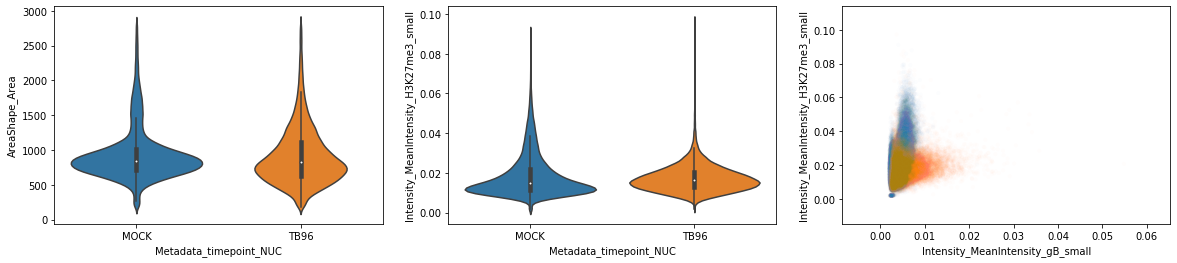

In [4]:
HCMVcc.DataCheck(df_combined_data, group_data_by, display_x_axis, display_y_axis)
#TODO: RENDER A FEW CELLS HERE ALSO, RANDOMLY SO WE GET AN IDEA OF DATA QUALITY BEFORE EXPORT

---

### STEP 3: Export images of each nucleus into a folder for use by the CNN

In [5]:
HCMVcc.IMGexport(df_combined_data,group_data_by,var_C1,var_C2,var_C3, exp_name, 400)
#TODO: show 10 random samples from each category in group_data_by with all channels and then just the ones used for the CNN 

EXAMPLE IDS: 149_20191126_repA_MOCK_1_2
CellProfiler scaled images by 4.6875


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 101597/101597 [01:11<00:00, 1422.92it/s]


### STEP 4: Train and Predict (or just predict) 

GO TO EITHER OF THE CNN_TRAIN AND PREDICT OR CNN_PREDICTIONS ONLY FROM GENERALIZABLE CNN

Once you are satisfied with the classification accuracy move on to the the next step
THIS WILL CREATE A LINK TO THIS Pridictions only [Predict from Generalizable CNN (click this link to go to notebook)](CNN_predictionsONLY.ipynb)

### STEP 7: Perform quantification of CNN predictions

In [6]:
import HCMVcellclassification as HCMVcc
predictions_folder_name = "CNNpredictions_20191215_2357"
exclude = ['blur','crap','overlap',
           '80confidence','70confidence','60confidence','50confidence']
df_predictions = HCMVcc.get_CNN_predictions(predictions_folder_name, exclude)

In [7]:
df_predictions_coords = HCMVcc.linescan_calculations(df_combined_data, df_predictions, radius_len=500)

In [ ]:
%matplotlib inline
HCMVcc.preview_linescans_MOCK(df_predictions_coords, 1, channel_li, 75)
#TODO: add fifth panel with overview of whole image and summary info under it (e,g, violin plot of range of values in the channel and where this example sites)
#TODO: add preview for TB96 here too

In [ ]:
linescan_width = 75
channel_li = ['URL_C1','URL_C2','URL_C3']
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]
df_linescans_MOCK = HCMVcc.getlinescans_MOCK(df_predictions_coords_MOCK, channel_li, exp_name, linescan_width)

In [ ]:
df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]
df_linescans_TB96 = HCMVcc.getlinescans_TB96(df_predictions_coords_TB96, channel_li, exp_name,linescan_width)

In [ ]:
#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
channel_dict = { 0:["C1","gB","red"],
                 1:["C2","Hoechst","blue"],
                 2:["C3","H3K27me3","green"] }

In [ ]:
import HCMVcellclassification as HCMVcc
df_FINAL = HCMVcc.merge_MOCK_TB()

In [ ]:
####### TESE THIS TIRAL LIENSCAN ON A BLANK ARRAY. IF YOU GET A GRADIENT THEN YOU"VE GOT A PROBLEM

In [ ]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"C1",
    "C2":"C2",
    "C3":"C3"}

In [ ]:
#### THIS IS UPDATE TO FIT WITH THE DATA FROM OUR ORIGINAL SCOPE ###
shift_val = 20
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_name,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_name,"MOCK")],df_lower.loc[(channel_name,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")
    
    #plot TB
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_name,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_name,"TB96")],df_lower.loc[(channel_name,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    midpoint = 250
    span = 75
    start = midpoint - span*3
    step = span/2
    stop = midpoint + span*3

    #ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(start,stop,step))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x-midpoint)/(75)*10,1))))
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

   # ax.set_xlim(100,450)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks_FORMATTED_linescan75px.png', dpi=600)
    plt.show()


In [ ]:
#####20200213###### attempting to export all the single images, starting with TB96
from pathlib import Path


import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_TB96.shape[0]
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_TB96['NUC_x0'][index])
        y0 = int(df_predictions_coords_TB96['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_TB96)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass


In [ ]:
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_MOCK.shape[0]
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_MOCK['NUC_x0'][index])
        y0 = int(df_predictions_coords_MOCK['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_MOCK["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_MOCK)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass

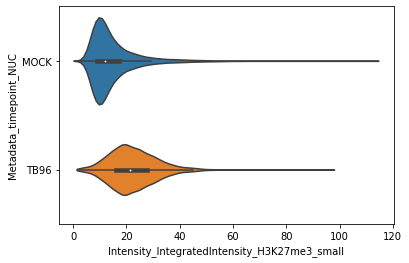

In [10]:
### now let's create a violin plot of the total abundance of H3K27me3

#group_data_by = "Metadata_timepoint_NUC"



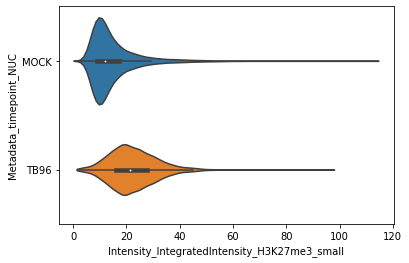

(101597, 113)
(31624, 113)
(69973, 113)


C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


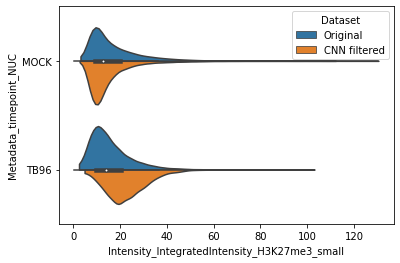

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df_predictions_coords.reset_index()
y_group = "Intensity_IntegratedIntensity_H3K27me3_small"
sns.violinplot(y=group_data_by, x=y_group, data=data, size=10, cut=0) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 
plt.show()

filtered_li = df_predictions["Unique_ID"]
df_combined_data_CNNfilterd = df_combined_data[df_combined_data["Unique_ID"].isin(filtered_li)]
df_combined_data_CNNremoved = df_combined_data[~df_combined_data["Unique_ID"].isin(filtered_li)]
print(df_combined_data.shape)
print(df_combined_data_CNNfilterd.shape)
print(df_combined_data_CNNremoved.shape)
df_combined_data["Dataset"] = "Original"
df_combined_data_CNNfilterd["Dataset"] = "CNN filtered"
df_combined_data_CNNremoved["Dataset"] = "removed"
df_combined_data_COMPOSITE = df_combined_data.copy()
df_combined_data_COMPOSITE = df_combined_data_COMPOSITE.append(df_combined_data_CNNfilterd)
sns.violinplot(y=group_data_by, x=y_group, data=df_combined_data_COMPOSITE.reset_index(), size=10 ,hue="Dataset", cut=-2,split=True,) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 

In [17]:
df_combined_data_COMPOSITE.to_csv(f"{exp_name}_df_combined_data_COMPOSITE_cnnoriginalvsfiltered.csv")

In [ ]:
###################### TESTING THAT I DONT HAVE PROBLEMS WITH AVERAGEING THE LINESCAN DATA ##########################

def line_profile_coordinates(src, dst, linewidth=1):
    """
    TAKEN FROM: https://github.com/scikit-image/scikit-image/blob/master/skimage/measure/profile.py
    Return the coordinates of the profile of an image along a scan line.
    Parameters
    ----------
    src : 2-tuple of numeric scalar (float or int)
        The start point of the scan line.
    dst : 2-tuple of numeric scalar (float or int)
        The end point of the scan line.
    linewidth : int, optional
        Width of the scan, perpendicular to the line
    Returns
    -------
    coords : array, shape (2, N, C), float
        The coordinates of the profile along the scan line. The length of the
        profile is the ceil of the computed length of the scan line.
    Notes
    -----
    This is a utility method meant to be used internally by skimage functions.
    The destination point is included in the profile, in contrast to
    standard numpy indexing.
    """
    src_row, src_col = src = np.asarray(src, dtype=float)
    dst_row, dst_col = dst = np.asarray(dst, dtype=float)
    d_row, d_col = dst - src
    theta = np.arctan2(d_row, d_col)

    length = int(np.ceil(np.hypot(d_row, d_col) + 1))
    # we add one above because we include the last point in the profile
    # (in contrast to standard numpy indexing)
    line_col = np.linspace(src_col, dst_col, length)
    line_row = np.linspace(src_row, dst_row, length)

    # we subtract 1 from linewidth to change from pixel-counting
    # (make this line 3 pixels wide) to point distances (the
    # distance between pixel centers)
    col_width = (linewidth - 1) * np.sin(-theta) / 2
    row_width = (linewidth - 1) * np.cos(theta) / 2
    perp_rows = np.array([np.linspace(row_i - row_width, row_i + row_width,
                                      linewidth) for row_i in line_row])
    perp_cols = np.array([np.linspace(col_i - col_width, col_i + col_width,
                                      linewidth) for col_i in line_col])
    return np.array([perp_rows, perp_cols])



import skimage.io
import scipy.ndimage
index = 20140
linewidth = 75
df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]
c = 'URL_C1'
x1 = df_predictions_coords_TB96["X_AC_fixedradius"][index]
y1 = df_predictions_coords_TB96["Y_AC_fixedradius"][index]

x2 = df_predictions_coords_TB96["X_NUC_fixedradius"][index]
y2 = df_predictions_coords_TB96["X_NUC_fixedradius"][index]

img_url = df_predictions_coords_TB96[c][index]
#image = skimage.io.imread(df_predictions_coords[c][index], as_gray=True)
#img = skimage.io.imread(img_url, as_gray=True, plugin='tifffile')
blank = np.zeros(1200,1200)
img = blank
#linescan = pd.Series(skimage.measure.profile_line(image, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean))
# i used this over scikit-image as there was a bug in their function, this should be more stable
linescan = scipy.ndimage.map_coordinates(np.transpose(img), line_profile_coordinates((x1,y1),(x2,y2), linewidth=linewidth))
linescan_2 = np.ma.masked_equal(linescan,0)
linescan_mean = linescan.mean(axis=1)

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2,figsize=(30,10))
ax[0,0].imshow(linescan)
ax[0,1].imshow(linescan_2)
ax[1,0].plot(linescan)
ax[1,1].plot(linescan_2)
ax[1,2].plot(linescan_mean)

In [ ]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"gB",
    "C2":"Hoechst",
    "C3":"H3K27me3"}

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    #plot TB96
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
       
    midpoint = 500
    span = 50
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(350,650)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks.png', dpi=600)
    plt.show()

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

#plot gB and Hoechst in the same graph:

import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 4 
f = plt.figure()   
ax = f.add_subplot(111)

ax2 = ax.twinx()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

ax2.spines["right"].set_position(("axes", 0.85))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)

channel_ID = "C1"
#plot MOCK gb
ax2.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax2.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="orange")

#plot TB gb
ax2.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax2.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5,facecolor="orange", hatch="//",edgecolor="white")

channel_ID = "C2"

#plot MOCK HOECHST
ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="royalblue")

#plot TB HOECHST
ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, facecolor="royalblue",hatch="\\\\",edgecolor="white")


#ax.yaxis.tick_right()
ax.yaxis.tick_right()
ax.yaxis.label.set_color("blue")
ax.tick_params(axis='y', colors="blue")
ax2.yaxis.label.set_color("darkorange")
ax2.tick_params(axis='y', colors="darkorange")
ax2.spines["right"].set_color('darkorange')

midpoint = 500
span = 50

ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
ax.yaxis.tick_right()

#leg = plt.legend(loc=2,frameon=False, fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)

ax2.set_ylim(120,790)

legA = ax.legend(loc="upper left", bbox_to_anchor=(0, 0.7), title_fontsize=14, title="Hoechst", ncol=1,frameon=False,fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legA._legend_box.align = "left"  
legB = ax2.legend(loc="upper left", ncol=1,frameon=False,  title="gB", title_fontsize=14,  fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legB._legend_box.align = "left"  
ax.yaxis.tick_right()

ax.set_xlim(350,650)

plt.savefig(f'{exp_name}_GRAPH_gB_Hoechst_WITHticks.png', dpi=600, bbox_inches = "tight")
plt.show()

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad


image_size = 300

df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#C1_temp = []
#C2_temp = []
C3_temp = []

total_shape = df_predictions_coords_MOCK.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_MOCK["NUC_x0"][index])
    y0 = int(df_predictions_coords_MOCK["NUC_y0"][index])
    
    ori_radians_MOCK = df_predictions_coords['NUC_orientation_radians'][index]
    ori_degrees_MOCK = np.degrees(ori_radians_MOCK)
    
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_C3 = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
    img_C3 = np.array(img_C3)
    cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_MOCK)
    C3_temp.append(cropped_rotated_C3[:,:])
    
C3_stacked = np.dstack(C3_temp)    
    
"""      
    img_C1 = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_C1 = pad(img_C1, pad_width=image_size, mode='constant')
    img_C1 = np.array(img_C1)
    cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C1 = rotate(cropped_C1, ori_degrees_MOCK)
    C1_temp.append(cropped_rotated_C1[:,:])
  
    img_C2 = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_C2 = pad(img_C2, pad_width=image_size, mode='constant')
    img_C2 = np.array(img_C2)
    cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C2 = rotate(cropped_C2, ori_degrees_MOCK)
    C2_temp.append(cropped_rotated_C2[:,:])
"""    



#C1_stacked = np.dstack(C1_temp)
#C2_stacked = np.dstack(C2_temp)


In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad


image_size = 300

df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#C1_temp = []
#C2_temp = []
C3_temp = []

total_shape = df_predictions_coords_MOCK.shape[0]

def get_stack(channel):

    #for index in index_li:
    for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
        x0 = int(df_predictions_coords_MOCK["NUC_x0"][index])
        y0 = int(df_predictions_coords_MOCK["NUC_y0"][index])

        ori_radians_MOCK = df_predictions_coords['NUC_orientation_radians'][index]
        ori_degrees_MOCK = np.degrees(ori_radians_MOCK)

        x1 = int(x0 + image_size - image_size/2)
        x2 = int(x1 + image_size)
        y1 = int(y0 + image_size - image_size/2)
        y2 = int(y1 + image_size)

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C3 = skimage.io.imread(df_predictions_coords_MOCK[channel][index], as_gray=True, plugin='tifffile')
        img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_MOCK)
        C3_temp.append(cropped_rotated_C3[:,:])

    C3_stacked = np.dstack(C3_temp)
    MOCK_C3_rotated_mean = C3_stacked.mean(axis=2)
    return(MOCK_C3_rotated_mean)

In [ ]:
def display_stack_mean(stack_mean_name, a_val, b_val):
    p2, p98 = np.percentile(stack_mean_name, (a_val, b_val))
    img_rescale = exposure.rescale_intensity(stack_mean_name, in_range=(p2, p98))
    plt.imshow(img_rescale,cmap="inferno")

In [ ]:
MOCK_C1_rotated_mean = get_stack("URL_C1")

In [ ]:
display_stack_mean(MOCK_C1_rotated_mean, 10, 100)

In [ ]:
MOCK_C2_rotated_mean = get_stack("URL_C2")

In [ ]:
skimage.io.imsave(f'{exp_name}_MOCK_C3_stacked.tif', C3_stacked, plugin='tifffile')

In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure
MOCK_C1_rotated_mean = C3_stacked.mean(axis=2)
#MOCK_C1_rotated_mean  = exposure.equalize_hist(MOCK_C1_rotated_mean)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r, cmap='viridis')
ax[1].imshow(average_g, cmap='viridis')
ax[2].imshow(average_b, cmap='viridis')

        
        


In [ ]:
#http://www.bioimgtutorials.com/2016/08/03/creating-a-z-stack-in-python/

In [ ]:
average_rgb = (np.dstack((average_r, average_g, average_b))/(32)).astype(np.uint8)

#plt.show(arr)
#print(arr)
ax[3].imshow(average_rgb)

plt.show()

In [ ]:
skimage.io.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

img_size = 300

p0, p100 = np.percentile(average_r, (30, 100))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (30, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (30, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))

red_8bit = (average_r_adjusted).astype('uint8')
green_8bit = (average_g_adjusted).astype('uint8')
blue_8bit = (average_b_adjusted).astype('uint8') 

average_rgb = cv2.merge((red_8bit,green_8bit,blue_8bit))

#average_rgb = np.dstack((average_r_adjusted, average_g_adjusted, average_b_adjusted))

#average_r_adjusted = exposure.rescale_intensity(average_r_adjusted,(0,100))

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0].transData)
patch_G = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1].transData)
patch_B = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[2].transData)
patch_RGB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[3].transData)

#display individual channel images and merged image
R_clip = ax[0].imshow(average_r_adjusted,'jet')
G_clip = ax[1].imshow(average_g_adjusted,'jet')
B_clip = ax[2].imshow(average_b_adjusted,'jet')
RGB_clip = ax[3].imshow(average_rgb)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

ax[0].add_artist(circle_R)
ax[0].axis('off')

ax[1].add_artist(circle_G)
ax[1].axis('off')

ax[2].add_artist(circle_B)
ax[2].axis('off')

ax[3].add_artist(circle_RGB)
ax[3].axis('off')
plt.show()

In [ ]:
HCMVcc.get_average_projections_MOCK(df_predictions_coords,image_size=300)

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad

image_size = 300

N = df_predictions_coords_MOCK.shape[0]
average_r_TB=np.zeros((image_size,image_size),np.float)
average_g_TB=np.zeros((image_size,image_size),np.float)
average_b_TB=np.zeros((image_size,image_size),np.float)
#index_li = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20]

#note, this will only work for mock 

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

total_shape = df_predictions_coords_TB96.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    print(x1,y1,x2,y2)
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_r = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_r = pad(img_r, pad_width=image_size, mode='constant')
    img_r = np.array(img_r)
    cropped_r = img_r[y1:y2,x1:x2] # y has to come before x
    
    img_g = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_g = pad(img_g, pad_width=image_size, mode='constant')
    img_g = np.array(img_g)
    cropped_g = img_g[y1:y2,x1:x2] # y has to come before x
    
    img_b = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_b = pad(img_b, pad_width=image_size, mode='constant')
    img_b = np.array(img_b)
    cropped_b = img_b[y1:y2,x1:x2] # y has to come before x
    
    #img_rgb = (np.dstack((img_r, img_g, img_b))/(32)).astype(np.uint8)

    #if cropped_r.shape[0] == image_size and cropped_r.shape[1] == image_size:
        
    cropped_rotated_r = rotate(cropped_r, ori_degrees_TB96)
    average_r_TB = average_r_TB + cropped_rotated_r/N

    cropped_rotated_g = rotate(cropped_g, ori_degrees_TB96)
    average_g_TB = average_g_TB + cropped_rotated_g/N

    cropped_rotated_b = rotate(cropped_b, ori_degrees_TB96)
    average_b_TB = average_b_TB + cropped_rotated_b/N

average_rgb_TB = (np.dstack((average_r_TB, average_g_TB, average_b_TB))/(32)).astype(np.uint8)

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r_TB, cmap='jet')
ax[1].imshow(average_g_TB, cmap='jet')
ax[2].imshow(average_b_TB, cmap='jet')
ax[3].imshow(average_rgb_TB)

plt.show()

In [ ]:
temp = []
image_size = 300
total_shape = df_predictions_coords_TB96.shape[0]

for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    img_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
    img_C3 = np.array(img_C3)
    cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_TB96)
    temp.append(cropped_rotated_C3[:,:])
    
stacked = np.dstack(temp)    

In [ ]:
df_predictions_coords_TB96.shape[0]

In [ ]:
TB_C3_rotated_mean = stacked.mean(axis=2)

In [ ]:
TB_C3_rotated_mean  = exposure.equalize_hist(TB_C3_rotated_mean)
plt.imshow(TB_C3_rotated_mean,cmap="Blues")

In [ ]:
skimage.io.imsave(f'{exp_name}_TB_average_R.tif', average_r_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_TB_average_G.tif', average_g_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_TB_average_B.tif', average_b_TB, plugin='tifffile')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

img_size = 300

p0, p100 = np.percentile(average_r, (40, 100))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))
p0, p100 = np.percentile(average_r_TB, (40, 100))
average_r_adjusted_TB  = exposure.rescale_intensity(average_r_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (40, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))
p0, p100 = np.percentile(average_g_TB, (40, 100))
average_g_adjusted_TB  = exposure.rescale_intensity(average_g_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (40, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))
p0, p100 = np.percentile(average_b_TB, (40, 100))
average_b_adjusted_TB  = exposure.rescale_intensity(average_b_TB, in_range=(p0, p100))

red_8bit_TB = (average_r_adjusted_TB*100).astype('uint8')
green_8bit_TB = (average_g_adjusted_TB*100).astype('uint8')
blue_8bit_TB = (average_b_adjusted_TB*100).astype('uint8') 

average_rgb_TB = cv2.merge((red_8bit_TB,green_8bit_TB,blue_8bit_TB))


fig, ax = plt.subplots(2,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,0].transData)
patch_G = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,1].transData)
patch_B = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,2].transData)
patch_RGB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,3].transData)

circle_R_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,0].transData)
patch_G_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,1].transData)
patch_B_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,2].transData)
patch_RGB_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,3].transData)

R_clip = ax[0,0].imshow(average_r_adjusted,'Reds')
G_clip = ax[0,1].imshow(average_g_adjusted,'Blues')
B_clip = ax[0,2].imshow(average_b_adjusted,'Greens')
RGB_clip = ax[0,3].imshow(average_rgb*2)

#display individual channel images and merged image
R_clip_TB = ax[1,0].imshow(average_r_adjusted_TB,'Reds')
G_clip_TB = ax[1,1].imshow(average_g_adjusted_TB,'Blues')
B_clip_TB = ax[1,2].imshow(average_b_adjusted_TB,'Greens')
RGB_clip_TB = ax[1,3].imshow(average_rgb_TB*2)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

R_clip_TB.set_clip_path(patch_R_TB)
G_clip_TB.set_clip_path(patch_G_TB)
B_clip_TB.set_clip_path(patch_B_TB)
RGB_clip_TB.set_clip_path(patch_RGB_TB)

ax[0,0].add_artist(circle_R)
ax[0,0].axis('off')

ax[0,1].add_artist(circle_G)
ax[0,1].axis('off')

ax[0,2].add_artist(circle_B)
ax[0,2].axis('off')

ax[0,3].add_artist(circle_RGB)
ax[0,3].axis('off')

ax[1,0].add_artist(circle_R_TB)
ax[1,0].axis('off')

ax[1,1].add_artist(circle_G_TB)
ax[1,1].axis('off')

ax[1,2].add_artist(circle_B_TB)
ax[1,2].axis('off')

ax[1,3].add_artist(circle_RGB_TB)
ax[1,3].axis('off')

plt.show()

In [ ]:
#############################################################

In [ ]:
#what happens wehn we filter out the non-polarized
df_TB_T = df_linescans_TB96.filter(like="_C3", axis=1).T

In [ ]:
### Now let's try this by filtering towards the well polarized ones

midpoint = 485
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,midpoint:(midpoint + 200)].mean(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,(midpoint-200):midpoint].mean(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.0
df_TB_T_polarized_to_AC = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*1.005*var)]
df_TB_T_polarized_to_rear = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*0.995*var)]


print(df_TB_T.shape)
print(df_TB_T_polarized_to_AC.shape)
print(df_TB_T_polarized_to_rear.shape)
df_TB_polarized_to_AC = df_TB_T_polarized_to_AC.T[:-3]
df_TB_polarized_to_rear = df_TB_T_polarized_to_rear.T[:-3]

In [ ]:
print(mean_polarization)

In [ ]:
polarized_li = []
for cols in df_TB_polarized_to_rear.columns:
    ID = cols[:-3]
    polarized_li.append(ID + "_C1")
    polarized_li.append(ID + "_C2")
    polarized_li.append(ID + "_C3")
#print(polarized_li)

In [ ]:
df_TB_profile_ALLreps = df_linescans_TB96

df_TB_profile_ALLreps_filterd = df_TB_profile_ALLreps.loc[:, df_TB_profile_ALLreps.columns.str.contains('|'.join(polarized_li))]
print(f'Filtering for {(df_TB_profile_ALLreps_filterd.shape[1]/df_TB_profile_ALLreps.shape[1])} of the population')

In [ ]:
#or just load df_linescans_MOCK from csv if you've already saved it down
#TODO: create loadlinescans_MOCK
import pandas as pd
df_linescans_MOCK = pd.read_csv(f'_linescans/{exp_name}_linescans_MOCK.csv')
df_linescans_TB96 = pd.read_csv(f'_linescans/{exp_name}_linescans_TB96.csv')

In [ ]:
#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
channel_dict = { 0:["C1","gB","red"],
                 1:["C2","Hoechst","blue"],
                 2:["C3","H3K27me3","green"] }

In [ ]:
def merge_MOCK_TB(df_MOCK, df_TB):
    print(df_MOCK.shape[1]/3) #4)
    print(df_TB.shape[1]/3) #4)
    
    df_FINAL = pd.concat([df_MOCK, df_TB], axis=1)


    print(df_FINAL.shape[1]/3)
    return df_FINAL
df_FINAL = merge_MOCK_TB(df_linescans_MOCK, df_linescans_TB96)

In [ ]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"gB",
    "C2":"Hoechst",
    "C3":"H3K27me3"}


In [ ]:
#### THIS IS UPDATE TO FIT WITH THE DATA FROM OUR ORIGINAL SCOPE ###
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    
    midpoint = 500
    span = 65
        
    #increment = 1
    #ticks_at = 5
    #start_val = 0
    #shift_axis = 64
    #end_Val = start_val + shift_axis + 20
    
    start = 500 -65*3
    step = 65/2
    stop = 650 + step
    

    #ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(start,stop,step))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x-500)/(65)*10,1))))
    
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(380,650)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks_FORMATTED.png', dpi=600)
    plt.show()


In [ ]:
df_FINAL = merge_MOCK_TB(df_linescans_MOCK, df_TB_profile_ALLreps_filterd)

In [ ]:
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1076), 1076)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    
    midpoint = 500
    span = 50
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(350,650)
    
    plt.savefig(f'{exp_name}_GRAPH_FILTERED_{channel_name}_WITHticks.png', dpi=600)
    plt.show()


In [ ]:
### Now let's try this by filtering towards the well polarized ones
df_TB_T = df_TB_profile_ALLreps.filter(like="_C3", axis=1).T
#df_TB_T = concat_df_TB.T
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,1050:1200].max(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,800:950].max(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.25
df_TB_T_polarized = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*var)]
df_TB_T_NOTpolarized = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*var)]
print(df_TB_T.shape)
print(df_TB_T_polarized.shape)
print(df_TB_T_NOTpolarized.shape)
df_TB_polarized = df_TB_T_polarized.T[:-3]
df_TB_NOTpolarized = df_TB_T_NOTpolarized.T[:-3]

In [ ]:
polarized_li = []
for cols in df_TB_polarized.columns:
    ID = cols[:-3]
    polarized_li.append(ID + "_C1")
    polarized_li.append(ID + "_C2")
    polarized_li.append(ID + "_C3")
    polarized_li.append(ID + "_C4")
#print(polarized_li)

In [ ]:
df_linescan_TB_filterd = df_TB_profile_ALLreps.loc[:, df_TB_profile_ALLreps.columns.str.contains('|'.join(polarized_li))]
print(df_TB_profile_ALLreps.shape)
print(df_linescan_TB_filterd.shape)

In [ ]:
    plt.plot(df_linescans_TB96.filter(regex=rep).filter(regex="URL_C2").mean(axis=1))
    plt.plot(df_linescans_TB96.filter(regex=rep).filter(regex="URL_C3").mean(axis=1))
plt.show()

        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 
        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)

In [ ]:
rep_list = ["repB","repC","repD"]
figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), constrained_layout=True,sharey='row') #,sharex=True)

for rep in rep_list:
    for channel_key, channel_info in channel_dict.items():

        df_linescans_channel_filtered = df_linescans.filter(regex=channel_info[0])

        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 

        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)

        ax[1,channel_key].plot(df_linescans_channel_filtered.mean(axis=1),channel_info[2])
        ax[1,channel_key].fill_between(N,channel_error_high,channel_error_low,color=channel_info[2],alpha=0.2)
        ax[1,channel_key].set_xlim(200,800)

        ax[1,3].plot(df_linescans_channel_filtered.mean(axis=1), channel_info[2])
        ax[1,3].fill_between(N,channel_error_high,channel_error_low, color=channel_info[2],alpha=0.2)

ax[0,3].set(title="MERGE")    
ax[1,3].set_xlim(200,800)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-colorblind")

#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)
# def plot_linescans_n_bioreps():

def plot_linescans_single_biorep(df_linescans, channel_dict):
    
    figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), constrained_layout=True,sharey='row') #,sharex=True)
    
    #TODO: get ticks onto the right
    
    for channel_key, channel_info in channel_dict.items():
        
        df_linescans_channel_filtered = df_linescans.filter(regex=channel_info[0])
        
        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 
        
        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)
        
        ax[1,channel_key].plot(df_linescans_channel_filtered.mean(axis=1),channel_info[2])
        ax[1,channel_key].fill_between(N,channel_error_high,channel_error_low,color=channel_info[2],alpha=0.2)
        ax[1,channel_key].set_xlim(200,800)
        
        ax[1,3].plot(df_linescans_channel_filtered.mean(axis=1), channel_info[2])
        ax[1,3].fill_between(N,channel_error_high,channel_error_low, color=channel_info[2],alpha=0.2)

    ax[0,3].set(title="MERGE")    
    ax[1,3].set_xlim(200,800)
    """
    circle_R_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_G_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_B_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_RGB_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)

    patch_MOCK_R = patches.Circle((300, 300), radius=300, transform=ax[0,0].transData)
    patch_MOCK_G = patches.Circle((300, 300), radius=300, transform=ax[0,1].transData)
    patch_MOCK_B = patches.Circle((300, 300), radius=300, transform=ax[0,2].transData)
    patch_MOCK_RGB = patches.Circle((300, 300), radius=300, transform=ax[0,3].transData)
    
    R_clip_MOCK = ax[0,0].imshow(average_r_adjusted,'Reds')
    G_clip_MOCK = ax[0,1].imshow(average_g_adjusted,'Blues')
    B_clip_MOCK = ax[0,2].imshow(average_b_adjusted,'Greens')
    RGB_clip_MOCK = ax[0,3].imshow(average_rgb)

    R_clip_MOCK.set_clip_path(patch_MOCK_R)
    G_clip_MOCK.set_clip_path(patch_MOCK_G)
    B_clip_MOCK.set_clip_path(patch_MOCK_B)
    RGB_clip_MOCK.set_clip_path(patch_MOCK_RGB)
    
    ax[0,0].add_artist(circle_R_MOCK)
    ax[0,0].axis('off')

    ax[0,1].add_artist(circle_G_MOCK)
    ax[0,1].axis('off')

    ax[0,2].add_artist(circle_B_MOCK)
    ax[0,2].axis('off')

    ax[0,3].add_artist(circle_RGB_MOCK)
    ax[0,3].axis('off')
    
    midpoint = 500
    span = 100
    img_size = 600
    
    for i in [0,1,2,3]:

        #draw verticle lines on the graph
        
        ax[1,i].axvline(x=midpoint, dashes=[5,5], linewidth=1,color='grey',alpha=0.5)
        ax[1,i].axvline(x=midpoint-span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint+span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint-2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint+2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        #ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        #ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
        
        ax[0,i].axvline(x=300, dashes=[5,5], linewidth=1,color='grey',alpha=0.5)
        #ax[0,i].axvline(x=300-span, dashes=[5,5],ymin=0.075, ymax=0.925, linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300+span, dashes=[5,5],ymin=0.075, ymax=0.925, linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300-2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300+2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        
        ax[0,i].axhline(y=300, dashes=[5,5],xmin=0, xmax=1, linewidth=1,color='k',alpha=0.5)
        ax[0,i].axhline(y=150, dashes=[5,5],xmin=0.075, xmax=0.925, linewidth=1,color='grey',alpha=0.5)
        ax[0,i].axhline(y=450, dashes=[5,5],xmin=0.075, xmax=0.925, linewidth=1,color='grey',alpha=0.5)
        
        #set x limis for the linescan graphs
        ax[1,i].set_xlim(midpoint - img_size/2, midpoint + img_size/2)
        
        #remove ticks and labels from some figures
 
        ax[1,i].set_xticklabels(["","-200","-100","0","+100","+200",""])
        ax[0,i].set_xticks([])
        ax[1,i].yaxis.set_label_position("right")
        ax[1,i].yaxis.tick_right()
    """
    #plt.ylabels.right()
    plt.show()      
        
plot_linescans_single_biorep(df_linescans_MOCK, channel_dict)

In [ ]:
plt.plot(df_linescans_TB96.filter(regex="gB").mean(axis=1))
plt.plot(df_linescans_TB96.filter(regex="DAPI").mean(axis=1))
plt.plot(df_linescans_TB96.filter(regex="H3K4me3").mean(axis=1))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)
# def plot_linescans_n_bioreps():
#def plot_linescans_single_biorep():

df_linescans_TB96_C1 = df_linescans_TB96.filter(regex="C1")
df_linescans_TB96_C2 = df_linescans_TB96.filter(regex="C2")
df_linescans_TB96_C3 = df_linescans_TB96.filter(regex="C3")

#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True, sharey=True)

ax[0,0].set(title=titles[0])
ax[1,0].plot(df_linescans_TB96_C1.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C1.mean(axis=1))
#TB96_C1_error_high = df_linescans_TB96_C1.mean(axis=1) + df_linescans_TB96_C1.std(axis=1)
#TB96_C1_error_low = df_linescans_TB96_C1.mean(axis=1) - df_linescans_TB96_C1.std(axis=1)
#N = list(df_linescans_TB96_C1.index)
#ax[1,0].fill_between(N,TB96_C1_error_high,TB96_C1_error_low)

ax[0,1].set(title=titles[1])
ax[1,1].plot(df_linescans_TB96_C2.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C2.mean(axis=1))
#TB96_C2_error_high = df_linescans_TB96_C2.mean(axis=1) + df_linescans_TB96_C2.std(axis=1)
#TB96_C2_error_low = df_linescans_TB96_C2.mean(axis=1) - df_linescans_TB96_C2.std(axis=1)
#N = list(df_linescans_TB96_C2.index)
#ax[1,1].fill_between(N,TB96_C2_error_high,TB96_C2_error_low)


ax[0,2].set(title=titles[2])
ax[1,2].plot(df_linescans_TB96_C3.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C3.mean(axis=1))
#TB96_C3_error_high = df_linescans_TB96_C3.mean(axis=1) + df_linescans_TB96_C3.std(axis=1)
#TB96_C3_error_low = df_linescans_TB96_C3.mean(axis=1) - df_linescans_TB96_C3.std(axis=1)
#N = list(df_linescans_TB96_C3.index)
#ax[1,2].fill_between(N,TB96_C3_error_high,TB96_C3_error_low)


ax[1,2].set_xlim(200,800)
plt.show()

In [ ]:
#from tqdm import tqdm
#import pandas as pd

#channel_li = ["URL_C1", "URL_C2","URL_C3"]

# TODO:
#def get_linescans_ACtoNUC(df, channel_li):

#df_linescans_TB96 = pd.DataFrame()

#for index, row in tqdm(df_predictions_coords_TB96.iterrows(), total=df_predictions_coords_TB96.shape[0]):
#    src = (df_predictions_coords_TB96["X_AC_fixedradius"][index],df_predictions_coords_TB96["Y_AC_fixedradius"][index])
#    dst = (df_predictions_coords_TB96["X_NUC_fixedradius"][index],df_predictions_coords_TB96["Y_NUC_fixedradius"][index])
#    for c in channel_li:
#        ID_Channel = df_predictions_coords_TB96["Unique_ID"][index] + "_" + c
#        image = skimage.io.imread(df_predictions_coords_TB96[c][index], as_gray=True)
#        linescan = pd.Series(skimage.measure.profile_line(image, src, dst, linewidth=50, order=0, mode='constant', cval=0.0, reduce_func=np.mean))
#        df_linescans_TB96[ID_Channel] = linescan

In [ ]:
"""
#TODO: now figure out how to do linescans with
import skimage
import matplotlib.pyplot as plt

img_val = 10

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

image_C1 = skimage.io.imread(df_predictions_coords_TB96["URL_C1"].iloc[img_val], as_gray=True)
image_C2 = skimage.io.imread(df_predictions_coords_TB96["URL_C2"].iloc[img_val], as_gray=True)
image_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"].iloc[img_val], as_gray=True)

src = (df_predictions_coords_TB96["X_AC_fixedradius"].iloc[img_val],df_predictions_coords_TB96["Y_AC_fixedradius"].iloc[img_val])
dst = (df_predictions_coords_TB96["X_NUC_fixedradius"].iloc[img_val],df_predictions_coords_TB96["Y_NUC_fixedradius"].iloc[img_val])

linescan_C1 = skimage.measure.profile_line(image_C1, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)
linescan_C2 = skimage.measure.profile_line(image_C2, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)
linescan_C3 = skimage.measure.profile_line(image_C3, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)

fig, ax = plt.subplots(2,4, figsize=(20,10))

ax[0,0].imshow(image_C1,cmap='viridis')
ax[0,0].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,0].plot(linescan_C1)

ax[0,1].imshow(image_C2,cmap='viridis')
ax[0,1].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,1].plot(linescan_C2)

ax[0,2].imshow(image_C3,cmap='viridis')
ax[0,2].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,2].plot(linescan_C3)

midpoint = 500
span = 100
for i in [0,1,2,3]:
    ax[1,i].axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')

ax[1,3].plot(linescan_C1)
ax[1,3].plot(linescan_C2)
ax[1,3].plot(linescan_C3)
#plt.tight_layout()
plt.show()

df_linescans_TB96.replace(0, np.nan, inplace=True)
df_linescans_TB96.shape
#os.makedirs("_linescans", exist_ok=True)
#df_linescans_TB96.to_csv(f'_linescans/{exp_name}_linescans_TB96.csv',index=False)
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)

# def plot_linescans_n_bioreps():


#def plot_linescans_single_biorep():

df_linescan_MOCK_500_C1 = df_linescans_MOCK.filter(regex="C1")
df_linescan_MOCK_500_C2 = df_linescans_MOCK.filter(regex="C2")
df_linescan_MOCK_500_C3 = df_linescans_MOCK.filter(regex="C3")

#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True, sharey=True)

ax[0,0].set(title=titles[0])
#ax[0,0].plot(df_linescan_MOCK_500_C1) 
ax[1,0].plot(df_linescan_MOCK_500_C1.mean(axis=1),'k-')

MOCK_C1_error_high = df_linescan_MOCK_500_C1.mean(axis=1) + df_linescan_MOCK_500_C1.std(axis=1)
MOCK_C1_error_low = df_linescan_MOCK_500_C1.mean(axis=1) - df_linescan_MOCK_500_C1.std(axis=1)
N=list(df_linescan_MOCK_500_C1.index)
ax[1,0].fill_between(N,MOCK_C1_error_high,MOCK_C1_error_low)

ax[0,1].set(title=titles[1])
#ax[0,1].plot(df_linescan_MOCK_500_C2) 
ax[1,1].plot(df_linescan_MOCK_500_C2.mean(axis=1),'k-')
MOCK_C2_error_high = df_linescan_MOCK_500_C2.mean(axis=1) + df_linescan_MOCK_500_C2.std(axis=1)
MOCK_C2_error_low = df_linescan_MOCK_500_C2.mean(axis=1) - df_linescan_MOCK_500_C2.std(axis=1)
N=list(df_linescan_MOCK_500_C2.index)
ax[1,1].fill_between(N,MOCK_C2_error_high,MOCK_C2_error_low)


ax[0,2].set(title=titles[2])
#ax[0,2].plot(df_linescan_MOCK_500_C3) 
ax[1,2].plot(df_linescan_MOCK_500_C3.mean(axis=1),'k-')
MOCK_C3_error_high = df_linescan_MOCK_500_C3.mean(axis=1) + df_linescan_MOCK_500_C3.std(axis=1)
MOCK_C3_error_low = df_linescan_MOCK_500_C3.mean(axis=1) - df_linescan_MOCK_500_C3.std(axis=1)
N=list(df_linescan_MOCK_500_C3.index)
ax[1,2].fill_between(N,MOCK_C3_error_high,MOCK_C3_error_low)
ax[1,2].set_xlim(200,800)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline


df_linescan_MOCK_500_C1 = df_linescans_TB96.filter(regex="C1")
df_linescan_MOCK_500_C2 = df_linescans_TB96.filter(regex="C2")
df_linescan_MOCK_500_C3 = df_linescans_TB96.filter(regex="C3")


titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True) #, sharey=True)

ax[0,0].set(title=titles[0])
#ax[0,0].plot(df_linescan_MOCK_500_C1) 
ax[1,0].plot(df_linescan_MOCK_500_C1.mean(axis=1),'k-')

#MOCK_C1_error_high = df_linescan_MOCK_500_C1.mean(axis=1) + df_linescan_MOCK_500_C1.std(axis=1)
#MOCK_C1_error_low = df_linescan_MOCK_500_C1.mean(axis=1) - df_linescan_MOCK_500_C1.std(axis=1)
#N=list(df_linescan_MOCK_500_C1.index)
#ax[1,0].fill_between(N,MOCK_C1_error_high,MOCK_C1_error_low)

ax[0,1].set(title=titles[1])
#ax[0,1].plot(df_linescan_MOCK_500_C2) 
ax[1,1].plot(df_linescan_MOCK_500_C2.mean(axis=1),'k-')
#MOCK_C2_error_high = df_linescan_MOCK_500_C2.mean(axis=1) + df_linescan_MOCK_500_C2.std(axis=1)
#MOCK_C2_error_low = df_linescan_MOCK_500_C2.mean(axis=1) - df_linescan_MOCK_500_C2.std(axis=1)
#N=list(df_linescan_MOCK_500_C2.index)
#ax[1,1].fill_between(N,MOCK_C2_error_high,MOCK_C2_error_low)


ax[0,2].set(title=titles[2])
#ax[0,2].plot(df_linescan_MOCK_500_C3) 
ax[1,2].plot(df_linescan_MOCK_500_C3.mean(axis=1),'k-')
#MOCK_C3_error_high = df_linescan_MOCK_500_C3.mean(axis=1) + df_linescan_MOCK_500_C3.std(axis=1)
#MOCK_C3_error_low = df_linescan_MOCK_500_C3.mean(axis=1) - df_linescan_MOCK_500_C3.std(axis=1)
#N=list(df_linescan_MOCK_500_C3.index)
#ax[1,2].fill_between(N,MOCK_C3_error_high,MOCK_C3_error_low)
#ax[1,2].set_xlim(200,800)

ax[1,3].plot(df_linescan_MOCK_500_C1.mean(axis=1))
ax[1,3].plot(df_linescan_MOCK_500_C2.mean(axis=1))
ax[1,3].plot(df_linescan_MOCK_500_C3.mean(axis=1))
#plt.tight_layout()

midpoint = 954
span = (400/26)*10
for i in [0,1,2,3]:
    ax[1,i].axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')

#TODO: ADD A TEXT BOX WITH INFO LIKE NUMBER OF REPLICATES place a text box in upper left in axes coords

plt.xlim(500,1500)

plt.show()


In [ ]:
df_linescans.shape

In [ ]:
import cv2
#TODO: figure out how to save these... 
#tifffile.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_G.tif', average_g, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_B.tif', average_b, dtype=np.uint16)

#average_r.astype('uint16')


import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

p0, p100 = np.percentile(average_r, (0, 25))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (40, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (20, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))

red_8bit = (average_r_adjusted).astype('uint8')
green_8bit = (average_g_adjusted).astype('uint8')
blue_8bit = (average_b_adjusted).astype('uint8') 

average_rgb = cv2.merge((red_8bit,green_8bit,blue_8bit))

#average_rgb = np.dstack((average_r_adjusted, average_g_adjusted, average_b_adjusted))

#average_r_adjusted = exposure.rescale_intensity(average_r_adjusted,(0,100))

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((300, 300), 298, color='k', fill=False)
circle_G = plt.Circle((300, 300), 298, color='k', fill=False)
circle_B = plt.Circle((300, 300), 298, color='k', fill=False)
circle_RGB = plt.Circle((300, 300), 298, color='k', fill=False)

patch_R = patches.Circle((300, 300), radius=300, transform=ax[0].transData)
patch_G = patches.Circle((300, 300), radius=300, transform=ax[1].transData)
patch_B = patches.Circle((300, 300), radius=300, transform=ax[2].transData)
patch_RGB = patches.Circle((300, 300), radius=300, transform=ax[3].transData)

#display individual channel images and merged image
R_clip = ax[0].imshow(average_r_adjusted,'jet')
G_clip = ax[1].imshow(average_g_adjusted,'jet')
B_clip = ax[2].imshow(average_b_adjusted,'jet')
RGB_clip = ax[3].imshow(average_rgb)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

ax[0].add_artist(circle_R)
ax[0].axis('off')

ax[1].add_artist(circle_G)
ax[1].axis('off')

ax[2].add_artist(circle_B)
ax[2].axis('off')

ax[3].add_artist(circle_RGB)
ax[3].axis('off')
plt.show()

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

N = df_predictions_coords_MOCK.shape[0]
average_r_TB=np.zeros((600,600),np.float)
average_g_TB=np.zeros((600,600),np.float)
average_b_TB=np.zeros((600,600),np.float)
#index_li = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20]

#note, this will only work for mock 

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

total_shape = df_predictions_coords_TB96.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    x1 = x0 - 300
    x2 = x0 + 300
    y1 = y0 - 300
    y2 = y0 + 300
    
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_r = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_r = np.array(img_r)
    cropped_r = img_r[y1:y2,x1:x2] # y has to come before x
    
    img_g = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_g = np.array(img_g)
    cropped_g = img_g[y1:y2,x1:x2] # y has to come before x
    
    img_b = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_b = np.array(img_b)
    cropped_b = img_b[y1:y2,x1:x2] # y has to come before x
    
    #img_rgb = (np.dstack((img_r, img_g, img_b))/(32)).astype(np.uint8)

    if cropped_r.shape[0] == 600 and cropped_r.shape[1] == 600:
        
        cropped_rotated_r = rotate(cropped_r, ori_degrees_TB96)
        average_r_TB = average_r_TB + cropped_rotated_r/N
        
        cropped_rotated_g = rotate(cropped_g, ori_degrees_TB96)
        average_g_TB = average_g_TB + cropped_rotated_g/N
        
        cropped_rotated_b = rotate(cropped_b, ori_degrees_TB96)
        average_b_TB = average_b_TB + cropped_rotated_b/N

average_rgb_TB = (np.dstack((average_r_TB, average_g_TB, average_b_TB))/(32)).astype(np.uint8)

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r_TB, cmap='jet')
ax[1].imshow(average_g_TB, cmap='jet')
ax[2].imshow(average_b_TB, cmap='jet')
ax[3].imshow(average_rgb_TB)

plt.show()

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

image_size = 300

N = df_predictions_coords_MOCK.shape[0]
average_r=np.zeros((image_size,image_size),np.float)
average_g=np.zeros((image_size,image_size),np.float)
average_b=np.zeros((image_size,image_size),np.float)
#index_li = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20]


total_shape = df_predictions_coords_MOCK.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_MOCK["NUC_x0"][index])
    y0 = int(df_predictions_coords_MOCK["NUC_y0"][index])
    ori_radians_MOCK = df_predictions_coords['NUC_orientation_radians'][index]
    ori_degrees_MOCK = np.degrees(ori_radians_MOCK)
    x1 = x0 - image_size/2
    x2 = x0 + image_size/2
    y1 = y0 - image_size/2
    y2 = y0 + image_size/2
    
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_r = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_r = np.array(img_r)
    cropped_r = img_r[y1:y2,x1:x2] # y has to come before x
    
    img_g = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_g = np.array(img_g)
    cropped_g = img_g[y1:y2,x1:x2] # y has to come before x
    
    img_b = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_b = np.array(img_b)
    cropped_b = img_b[y1:y2,x1:x2] # y has to come before x
    
    #img_rgb = (np.dstack((img_r, img_g, img_b))/(32)).astype(np.uint8)

    if cropped_r.shape[0] == image_size and cropped_r.shape[1] == image_size:
        
        cropped_rotated_r = rotate(cropped_r, ori_degrees_MOCK)
        average_r = average_r + cropped_rotated_r/N
        
        cropped_rotated_g = rotate(cropped_g, ori_degrees_MOCK)
        average_g = average_g + cropped_rotated_g/N
        
        cropped_rotated_b = rotate(cropped_b, ori_degrees_MOCK)
        average_b = average_b + cropped_rotated_b/N

average_rgb = (np.dstack((average_r, average_g, average_b))/(32)).astype(np.uint8)

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r, cmap='jet')
ax[1].imshow(average_g, cmap='jet')
ax[2].imshow(average_b, cmap='jet')
ax[3].imshow(average_rgb)

plt.show()

#plt.show(arr)
#print(arr)
    
    

In [ ]:
import cv2
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image

def IMGexportv2(df_combined_data, img_val, export_dimensions):
    
    export_dimensions = int(export_dimensions)
    img_border = int(export_dimensions/2)
    
    img_C1_16bit = skimage.io.imread(df_combined_data["URL_C1"][img_val], as_gray=True, plugin='tifffile')
    original_img_dimensions = img_C1_16bit.shape[0]
    cp_downscaled_ratio = original_img_dimensions / 256
    print(cp_downscaled_ratio)
    
    df_combined_data['NUC_x0'] = df_combined_data[('Location_Center_X_NUC')] * cp_downscaled_ratio #correcting for downscaling
    df_combined_data['NUC_y0'] = df_combined_data[('Location_Center_Y_NUC')] * cp_downscaled_ratio #correcting for downscaling
    
    df_combined_data['URL_C1'] = df_combined_data[var_C1] #this will be red in imageJ
    df_combined_data['URL_C2'] = df_combined_data[var_C2] #this will be green in imageJ
    #df_combined_data['URL_C3'] = df_combined_data[var_C3] #this will be blue in imageJ
    #df_combined_data['URL_C4'] = df_combined_data[var_C4] #this will be blue in imageJ
    
    #get coordinates caluclated for (x1,y1) and (x2,y2) to draw linescans
    x0 = df_combined_data["NUC_x0"][img_val]
    y0 = df_combined_data["NUC_y0"][img_val]
    border_x1 = x0 - img_border
    border_y1 = y0 - img_border
    print(x0,",",y0)

    #load images
    img_C1_16bit = skimage.io.imread(df_combined_data["URL_C1"][img_val], as_gray=True, plugin='tifffile')
    img_C2_16bit = skimage.io.imread(df_combined_data["URL_C2"][img_val], as_gray=True, plugin='tifffile')
    #img_C3_16bit = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][img_val], as_gray=True, plugin='tifffile')
    #img_C4_16bit = skimage.io.imread(df_predictions_coords_MOCK["URL_C4"][img_val], as_gray=True, plugin='tifffile')

    p0, p100 = np.percentile(img_C1_16bit, (0, 100))
    img_C1_16bit_rescaled = exposure.rescale_intensity(img_C1_16bit, in_range=(p0*1.3, p100*1.1))
    
    p0, p100 = np.percentile(img_C2_16bit, (0, 100))
    img_C2_16bit_rescaled = exposure.rescale_intensity(img_C2_16bit, in_range=(p0*1.3, p100))

    img_C1_8bit = (img_C1_16bit_rescaled/256).astype('uint8')
    img_C2_8bit = (img_C2_16bit_rescaled/256).astype('uint8')
    img_blank_8bit = img_C1_8bit * 0 # this makes it black
    #img_C3_8bit = img_C3_16bit/32).astype('uint8')
    #img_C4_8bit = img_C3_16bit/32).astype('uint8')
    
    #to save on memory, now that we've used this data, set it to None
    #img_C1_16bit = None
    #img_C2_16bit = None
    #img_C3_16bit = None
    #img_C4_16bit = None

    merged_channels = cv2.merge((img_C1_8bit,img_C2_8bit,img_blank_8bit))

    #red_8bit = None
    #green_8bit = None
    #blue_8bit = None

    merged_channels_border = cv2.copyMakeBorder(merged_channels, img_border, img_border, img_border, img_border, cv2.BORDER_CONSTANT, value=0) 
    
    fig, ax = plt.subplots(2,4, figsize=(10,5),  constrained_layout=True)

    # Create a Rectangle patch
    rect1 = patches.Rectangle((border_x1,border_y1),export_dimensions,export_dimensions,linewidth=2,edgecolor='r',facecolor='none')
    rect2 = patches.Rectangle((border_x1,border_y1),export_dimensions,export_dimensions,linewidth=2,edgecolor='r',facecolor='none')
    rect3 = patches.Rectangle((border_x1,border_y1),export_dimensions,export_dimensions,linewidth=2,edgecolor='r',facecolor='none')
    rect4 = patches.Rectangle((border_x1,border_y1),export_dimensions,export_dimensions,linewidth=2,edgecolor='r',facecolor='none')
    
    ax[0,0].imshow(img_C1_16bit)
    ax[0,1].imshow(img_C2_16bit)
    ax[0,2].imshow(img_blank_8bit)
    ax[0,3].imshow(img_blank_8bit)
    
    ax[0,1].add_patch(rect1)
    ax[0,1].scatter(x0, y0, s=10,color='red')
    ax[0,2].add_patch(rect2)
    ax[0,2].scatter(x0, y0, s=10,color='red')
    
    ax[1,0].imshow(img_C1_8bit)
    ax[1,1].imshow(img_C2_8bit)
    ax[1,2].imshow(merged_channels)
    
    ax[1,1].add_patch(rect3)
    ax[1,1].scatter(x0, y0, s=10,color='red')
    ax[1,2].add_patch(rect4)
    ax[1,2].scatter(x0, y0, s=10,color='red')
    
    ax[1,3].imshow(merged_channels_border)
    ax[1,3].set_xlim(x0,x0+export_dimensions)
    ax[1,3].set_ylim(y0,y0+export_dimensions)
    
IMGexportv2(df_combined_data, 80012, 400)